# Project: Prediction using Supervised Machine Learning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>    
</ul>

<a id='intro'></a>
## Introduction

>This dataset includes records about both the percentage a student get and the number of study hours

>By applying Linear Regression, we aim to predict the percentage a student get depending on hours spent studying

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [41]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
df.shape

(25, 2)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [44]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking for missing values..

In [45]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Checking for duplicates.. 

In [46]:
df.duplicated().sum()

0

## Ploting the data for better insights

<Figure size 936x936 with 0 Axes>

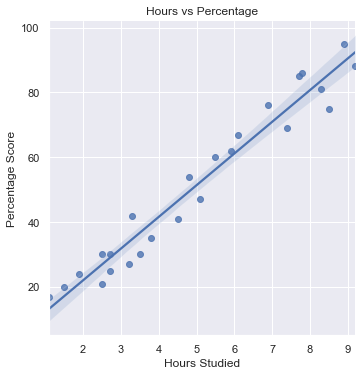

In [47]:
plt.figure(figsize=(13,13))
sns.lmplot(x = 'Hours', y = 'Scores', data = df)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show();

> The two variables seem to have a strong relation

## Checking for Linearity

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

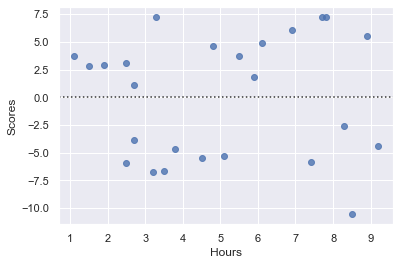

In [48]:
sns.residplot(x ='Hours', y = 'Scores', data = df)

>The errors are almost equally distributed around the line which means that a linear model is best for the dataset

## Preparing the data

In [26]:
X = df['Hours'].values
y = df['Scores'].values
X = X.reshape(-1,1)


## Spliting the data into training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Algorithm

In [49]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
#Calculating Rsquared..
lm.score(X_train,y_train)

0.9515510725211552

In [51]:
#Calculating the intercept..
lm.intercept_

2.018160041434683

In [52]:
#Calculating the slope..
lm.coef_

array([9.91065648])

## Making predictions 

In [33]:
y_pred = lm.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Comparing both the predicted and actual data

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting what percentage a student should aquire if has spent 9.25 hours studying

In [53]:
hours = 9.25
prediction = lm.predict([[9.25]])
prediction

array([93.69173249])

> Accourding to the model a student spent 9.25 hours studying should get a score around 93.7

## **Evaluating the model**

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## Ploting both the actual and predicted model 

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


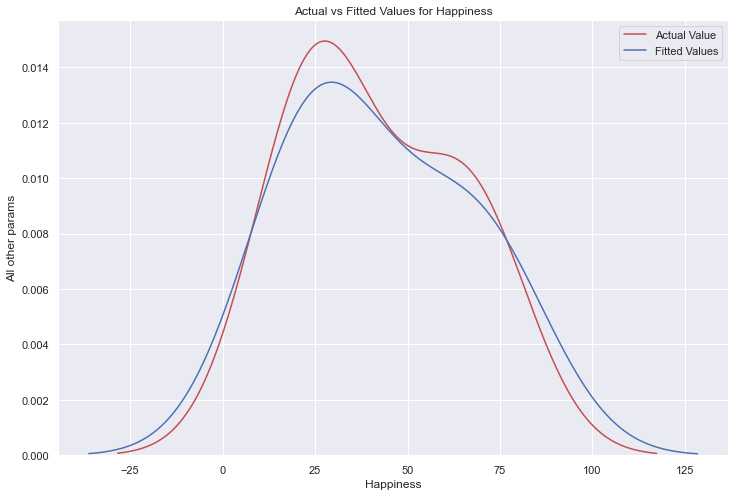

In [55]:
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Happiness')
plt.xlabel('Happiness')
plt.ylabel('All other params')
plt.legend()
plt.show()
plt.close()

> There is still a space of improvement but overall, the model has done a good job predicting the data.